In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from scipy import stats
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
basics = pd.read_csv('Data/title_basics.csv.gz',low_memory = False)
akas = pd.read_csv('Data/title_akas.csv.gz',low_memory = False)
ratings = pd.read_csv('Data/title_ratings.csv.gz', low_memory = False)
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory = False)
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv', low_memory = False)
year_2010 = pd.read_csv('Data/final_tmdb_data_2010.csv', low_memory = False)
year_2011 = pd.read_csv('Data/final_tmdb_data_2011.csv', low_memory = False, lineterminator='\n')
year_2012 = pd.read_csv('Data/final_tmdb_data_2012.csv', low_memory = False, lineterminator='\n')
year_2013 = pd.read_csv('Data/final_tmdb_data_2013.csv', low_memory = False)
year_2014 = pd.read_csv('Data/final_tmdb_data_2014.csv', low_memory = False, lineterminator='\n')
year_2015 = pd.read_csv('Data/final_tmdb_data_2015.csv', low_memory = False, lineterminator='\n')
year_2016 = pd.read_csv('Data/final_tmdb_data_2016.csv', low_memory = False)
year_2017 = pd.read_csv('Data/final_tmdb_data_2017.csv', low_memory = False, lineterminator='\n')
year_2018 = pd.read_csv('Data/final_tmdb_data_2018.csv', low_memory = False, lineterminator='\n')
year_2019 = pd.read_csv('Data/final_tmdb_data_2019.csv', low_memory = False, lineterminator='\n')
year_2020 = pd.read_csv('Data/final_tmdb_data_2020.csv', low_memory = False, lineterminator='\n')
year_2021 = pd.read_csv('Data/final_tmdb_data_2021.csv', low_memory = False)

In [3]:
tmdb_df = pd.concat([year_2000, year_2001, year_2010,year_2011, year_2012, 
                     year_2013,year_2014, year_2015, year_2016, year_2017, 
                     year_2018, year_2019, year_2020, year_2021])
tmdb_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG


In [4]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46648 entries, 0 to 3532
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                46648 non-null  object 
 1   adult                  46634 non-null  float64
 2   backdrop_path          30144 non-null  object 
 3   belongs_to_collection  2758 non-null   object 
 4   budget                 46634 non-null  float64
 5   genres                 46634 non-null  object 
 6   homepage               12260 non-null  object 
 7   id                     46634 non-null  float64
 8   original_language      46634 non-null  object 
 9   original_title         46634 non-null  object 
 10  overview               45609 non-null  object 
 11  popularity             46634 non-null  float64
 12  poster_path            42958 non-null  object 
 13  production_companies   46634 non-null  object 
 14  production_countries   46634 non-null  object 
 15  rel

In [5]:
tmdb_df = tmdb_df.dropna(subset=['certification','revenue'])

## Hypothesis Testing

# Q1: Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

- $H_0$ (Null Hypothesis): There is no significant difference between revenue and the rating of a movie.
- $H_A$ (Alternative Hypothesis):  There is a significant difference between revenue and the rating of a movie.

###  Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? > 2 groups
- Therefore, which test is appropriate? ANOVA

In [6]:
tmdb_df = tmdb_df[tmdb_df.revenue !=0]

In [7]:
tmdb_df['certification'].value_counts()

R         1497
PG-13     1056
PG         394
NR         198
G           75
NC-17       14
R            1
PG-13        1
Name: certification, dtype: int64

In [8]:
tmdb_df['certification'] = tmdb_df['certification'].replace({'R ': 'R',
                                                            'PG-13 ': 'PG-13'})
tmdb_df['certification'].value_counts()

R        1498
PG-13    1057
PG        394
NR        198
G          75
NC-17      14
Name: certification, dtype: int64

In [9]:
# Create groups dictionary.
groups = {}
## Loop through all unique categories
for rating in tmdb_df['certification'].unique():
    ## Get series for group and rename
    data = tmdb_df.loc[tmdb_df['certification']==rating,'revenue'].copy()
    
    # save into the dictionary
    groups[rating] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13', 'NR', 'NC-17'])

### Checking for Outliers

In [10]:
## Loop through groups dict
for rating, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {rating} group.")

    ## Remove the outiers from data and overwrite the region data in the dict
    data = data.loc[~outliers]
    groups[rating] = data

There were 14 outliers in the PG group.
There were 34 outliers in the R group.
There were 2 outliers in the G group.
There were 25 outliers in the PG-13 group.
There were 3 outliers in the NR group.
There were 0 outliers in the NC-17 group.


### Test for Normality

In [11]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for rating, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([rating,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,group,n,pval,sig?
0,PG,380,3.545612e-31,True
1,R,1464,1.116438e-162,True
2,G,73,3.374177e-12,True
3,PG-13,1032,9.971207e-109,True
4,NR,195,1.294635e-35,True
5,NC-17,14,6.364168e-02,False


- We failed the assumpution for normality for G, PG, PG-13, R, and NR groups, but these groups are large enough that we can safely disregard the assumption of normality.

In [12]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=74.36269611478022, pvalue=7.783857027671632e-74)


In [13]:
## Use an if-else to help interpret the p-value
if result.pvalue < 0.5:
    print(f'The groups do NOT have equal variance.')
else:
    print(f'the groups DO have equal variance.')

The groups do NOT have equal variance.


- We reject the null hypothesis of equal variance.
- We wanted to run ANOVA test, but will need to use Kruskal-Wallis test insead.

In [14]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=522.9041145477723, pvalue=9.07309331323976e-111)


True

- We reject the null hypothesis and support that there is a significant difference between revenue and the rating of a movie.

<AxesSubplot: xlabel='certification', ylabel='revenue'>

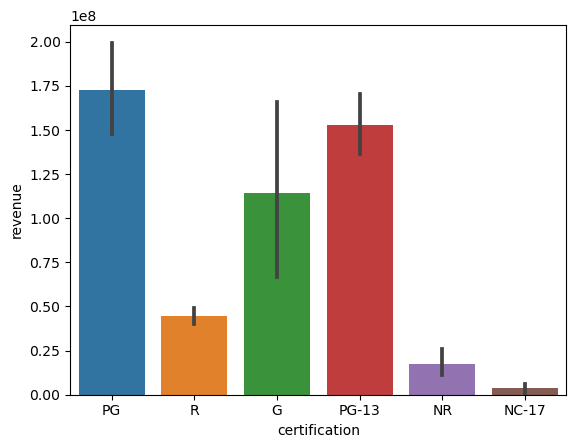

In [15]:
sns.barplot(data=tmdb_df, x='certification', y='revenue')

- PG group has the highest mean revenue and NC-17 group has the lowest mean revenue.

# Question 2: Do movies that are 2.5 hours or longer earn more revenue than movies that are less than 2.5 hours?

- $H_0$ (Null Hypothesis): There is no significant difference between revenue and the length of a movie.
- $H_A$ (Alternative Hypothesis):  There is a significant difference between revenue and the length of a movie.

###  Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? 2 groups
- Therefore, which test is appropriate? 2 sample t-test

In [16]:
tmdb_df['runtime'].value_counts()

100.0    101
90.0     100
97.0      98
105.0     95
94.0      93
        ... 
166.0      1
183.0      1
224.0      1
179.0      1
156.0      1
Name: runtime, Length: 123, dtype: int64

In [17]:
tmdb_df['longer_movie'] = tmdb_df['runtime'] >= 150

In [18]:
tmdb_df['longer_movie'].value_counts

<bound method IndexOpsMixin.value_counts of 4       False
11      False
13      False
16      False
17      False
        ...  
3456    False
3461    False
3489    False
3510    False
3532    False
Name: longer_movie, Length: 3236, dtype: bool>

In [19]:
## save list of columns needed for each group
needed_cols = ['longer_movie', 'revenue']

In [20]:
## save male team in separate variable
longer_movie_df = tmdb_df.loc[tmdb_df['longer_movie']==True, needed_cols]
longer_movie_df

,longer_movie,revenue
156,True,465361176.0
239,True,215294342.0
587,True,4900000.0
787,True,20908467.0
9,True,871368364.0
...,...,...
2743,True,774153007.0
2784,True,74530532.0
2825,True,27000000.0
3110,True,39629195.0


In [21]:
## save male team in separate variable
shorter_movie_df = tmdb_df.loc[tmdb_df['longer_movie']==False, needed_cols]
shorter_movie_df

,longer_movie,revenue
4,False,12854953.0
11,False,14904.0
13,False,224834564.0
16,False,105983.0
17,False,546388105.0
...,...,...
3456,False,22957625.0
3461,False,4284903.0
3489,False,8756.0
3510,False,44888959.0


In [22]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([shorter_movie_df, longer_movie_df])
plot_df

,longer_movie,revenue
4,False,12854953.0
11,False,14904.0
13,False,224834564.0
16,False,105983.0
17,False,546388105.0
...,...,...
2743,True,774153007.0
2784,True,74530532.0
2825,True,27000000.0
3110,True,39629195.0


<AxesSubplot: xlabel='longer_movie', ylabel='revenue'>

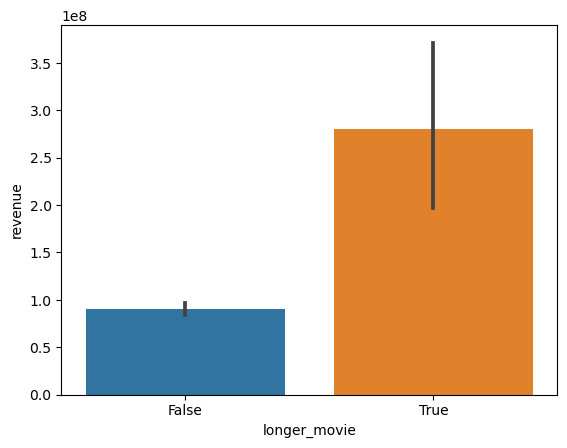

In [23]:
## visualize the group means
sns.barplot(data=plot_df, x='longer_movie', y='revenue')

In [24]:
## Saving JUST the numeric col as final group variables
longer_movie_group = longer_movie_df['revenue']
shorter_movie_group = shorter_movie_df['revenue']
longer_movie_group

156     465361176.0
239     215294342.0
587       4900000.0
787      20908467.0
9       871368364.0
           ...     
2743    774153007.0
2784     74530532.0
2825     27000000.0
3110     39629195.0
3320    402027582.0
Name: revenue, Length: 84, dtype: float64

In [25]:
## Check smoker group for outliers
longer_movie_outliers = np.abs(stats.zscore(longer_movie_group)) > 3

## how many outliers?
longer_movie_outliers.sum()

1

In [26]:
## Check smoker group for outliers
shorter_movie_outliers = np.abs(stats.zscore(shorter_movie_group)) > 3

## how many outliers?
shorter_movie_outliers.sum()

84

In [27]:
## remove outliers from female_group
shorter_movie_group = shorter_movie_group.loc[~shorter_movie_outliers]
shorter_movie_group

4        12854953.0
11          14904.0
13      224834564.0
16         105983.0
17      546388105.0
           ...     
3456     22957625.0
3461      4284903.0
3489         8756.0
3510     44888959.0
3532      4588389.0
Name: revenue, Length: 3068, dtype: float64

In [28]:
result = stats.normaltest(longer_movie_group)
print(result.pvalue)
result.pvalue < .05

1.007169633856034e-17


True

In [29]:
len(longer_movie_group)

84

In [30]:
result = stats.normaltest(shorter_movie_group)
result.pvalue < .05

True

In [31]:
len(shorter_movie_group)

3068

- We fail to reject the null hypothesis that there is no statistical difference between the longer_movie_group and a normal distribution. 
- We reject the null hypothesis and conclude that there is a statistical difference between the shorter_movie_group and a normal distribution.

In [32]:
## Use Levene's test for equal variance
result = stats.levene(longer_movie_group, shorter_movie_group)
print(result)

LeveneResult(statistic=213.2276755363153, pvalue=8.865320355544318e-47)


In [33]:
## Use an if-else to help interpret the p-value
if result.pvalue < 0.5:
    print(f'The groups do NOT have equal variance.')
else:
    print(f'the groups DO have equal variance.')

The groups do NOT have equal variance.


In [34]:
## run final hypothess test
result = stats.ttest_ind(longer_movie_group, shorter_movie_group, equal_var=False)
print(result)
result.pvalue < 0.05

Ttest_indResult(statistic=4.516633931056297, pvalue=2.0525359810698815e-05)


True

- We fail to reject the null hypothesis that there is no significant difference between revenue and the length of a movie.

In [35]:
print(f'The average revenue for longer_movie_group was {longer_movie_group.mean(): .2f}')
print(f'There average revenue for shorter_movie_group was {shorter_movie_group.mean(): .2f}')

The average revenue for longer_movie_group was  280299008.55
There average revenue for shorter_movie_group was  65716771.92


In [36]:
# create dataframe without outliers
plot_df = pd.concat([longer_movie_df.loc[~longer_movie_outliers],
                    shorter_movie_df.loc[~shorter_movie_outliers]], axis=0)
plot_df

,longer_movie,revenue
156,True,465361176.0
239,True,215294342.0
587,True,4900000.0
787,True,20908467.0
9,True,871368364.0
...,...,...
3456,False,22957625.0
3461,False,4284903.0
3489,False,8756.0
3510,False,44888959.0


<AxesSubplot: xlabel='longer_movie', ylabel='revenue'>

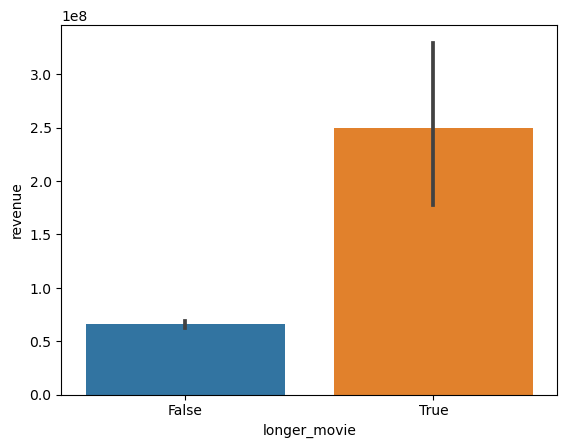

In [37]:
# vizualize means without outliers
sns.barplot(data=plot_df, x='longer_movie', y='revenue')

- There is a higher mean revenue for movies at least 2.5 hours than movies that are less than 2.5 hours.

# Q3: Do movies released in 2020 earn less revenue than movies released in 2018?